# Setting up the dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import yfinance as yf

# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [73]:
# We can now change the start and end date of our applee
# set as per our requirment

START_DATE = "2018-01-01" # @param {type: "date"}
END_DATE = "2023-01-12" # @param {type: "date"}

apple = yf.download('AAPL', start=START_DATE, end=END_DATE)
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722878,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715778,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370625,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216961,82271200
...,...,...,...,...,...,...
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325089,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899521,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800


# MACD

In [74]:
# Implementing MACD
apple['MACD'] = apple.Close.ewm(span = 12, adjust = False).mean() - apple.Close.ewm(span = 26, adjust = False).mean()
apple['Signal_MACD'] = apple.MACD.ewm(span = 9, adjust = False).mean()
apple

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_MACD
Date,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722878,102223600,0.000000,0.000000
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715778,118071600,-0.000598,-0.000120
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,0.014894,0.002883
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370625,94640000,0.066150,0.015537
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216961,82271200,0.092592,0.030948
...,...,...,...,...,...,...,...,...
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325089,80962700,-4.916453,-4.208037
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899521,87754700,-4.584079,-4.283245
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800,-4.229153,-4.272427


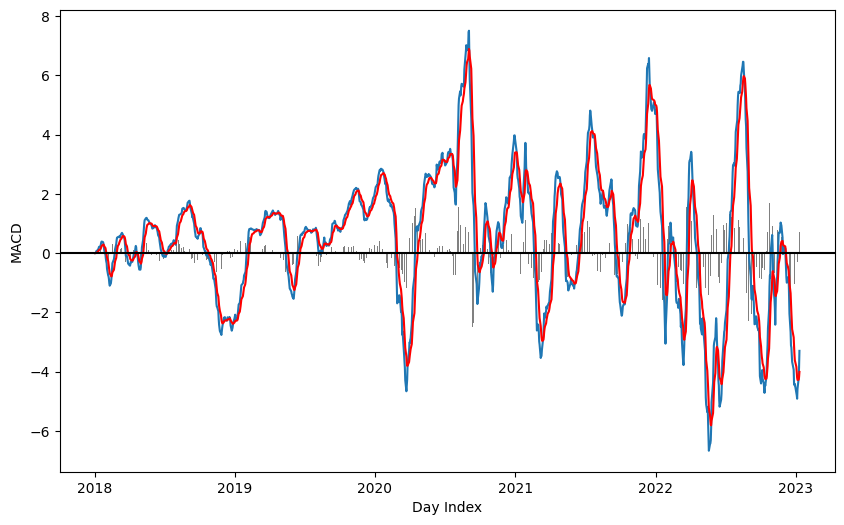

In [75]:
plt.figure(figsize = (10, 6))
plt.plot(apple.MACD)
plt.plot(apple.Signal_MACD, color = "Red")

plt.axhline(y = 0, color = "Black", linestyle='-')  # BaseLine
plt.bar(apple.index, apple.MACD - apple.Signal_MACD, color="Grey", width = 0.6)
plt.xlabel("Day Index")
plt.ylabel("MACD")
plt.show()

# RSI

In [76]:
apple['Change'] = apple.Close.diff()

apple['up'] = apple.Change.apply(lambda x: x if x > 0 else 0)
apple['down'] = apple.Change.apply(lambda x: abs(x) if x < 0 else 0)

avg_gain = apple.up[1:].rolling(window=14).mean()
avg_loss = apple.down[1:].rolling(window=14).mean()

rs = avg_gain / avg_loss
rs[avg_loss == 0] = 0

apple['RSI'] = 100 - (100 / (1 + rs))
apple

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_MACD,Change,up,down,RSI
Date,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722878,102223600,0.000000,0.000000,NaN,0.000000,0.000000,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715778,118071600,-0.000598,-0.000120,-0.007500,0.000000,0.007500,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,0.014894,0.002883,0.200001,0.200001,0.000000,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370625,94640000,0.066150,0.015537,0.492500,0.492500,0.000000,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216961,82271200,0.092592,0.030948,-0.162498,0.000000,0.162498,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325089,80962700,-4.916453,-4.208037,-1.340004,0.000000,1.340004,23.902412
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899521,87754700,-4.584079,-4.283245,4.599998,4.599998,0.000000,39.492959
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800,-4.229153,-4.272427,0.529999,0.529999,0.000000,43.030682


# Marubozu

In [77]:
apple['Signal'] = 0

for i in range(len(apple)):
  E = 0.1
  # Buying Signal = 0 means no position, 1 means buying signal and -1 means selling signal
  # Buying
  if(abs(apple.High[i] - apple.Close[i]) < E and abs(apple.Open[i] - apple.Low[i]) < E and apple.RSI[i] < 70):
    apple.Signal[i] = 1
  if(apple.MACD[i] > apple.Signal_MACD[i] and apple.RSI[i] < 70):
    apple.Signal[i] = 1

  # Selling
  if(abs(apple.Open[i] - apple.High[i]) < E and abs(apple.Low[i] - apple.Close[i]) < E and apple.RSI[i] > 30):
    apple.Signal[i] = -1
  if(apple.MACD[i] < apple.Signal_MACD[i] and apple.RSI[i] > 30):
    apple.Signal[i] = -1

apple

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_MACD,Change,up,down,RSI,Signal
Date,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722878,102223600,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715778,118071600,-0.000598,-0.000120,-0.007500,0.000000,0.007500,NaN,0
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,0.014894,0.002883,0.200001,0.200001,0.000000,NaN,0
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370625,94640000,0.066150,0.015537,0.492500,0.492500,0.000000,NaN,0
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216961,82271200,0.092592,0.030948,-0.162498,0.000000,0.162498,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325089,80962700,-4.916453,-4.208037,-1.340004,0.000000,1.340004,23.902412,0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899521,87754700,-4.584079,-4.283245,4.599998,4.599998,0.000000,39.492959,-1
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800,-4.229153,-4.272427,0.529999,0.529999,0.000000,43.030682,1


# Implementing Trading

In [78]:
initial_portfolio = 1000  # Stores our initial portfolio
curr_portfolio = initial_portfolio  # Stores the current portfolio
portion = 0.8 # Portion of the portfolio to be invested
trading = 0  # Stores the status of trading
profit, loss = [], [] # Stores the profit and loss values
entry, exit = [], []  # Stores the entry and exit indices
duration = []  # Stores the duration of the trade
returns = []  # Stores the returns of the trade
drawdown = [] # Stores the drawdown values for each trade
portfolio = []  # Stores the porfolio value after each trade
portfolio.append(curr_portfolio)
tp = 0.07
sl = 0.05

# Only a single trade can be active at a time
for i in range(len(apple)):

  # No trade is open right now
  if (trading == 0):
    if(apple.Signal[i] == 1):
      cost = apple.Close[i] # Store the buy price
      trading = 1 # Set the status to buy mode
      entry.append(i)
      Take = (1 + tp) * apple.Close[i]
      Stop = (1 - sl) * apple.Close[i]

    elif (apple.Signal[i] == -1):
      cost = apple.Close[i]
      trading = -1 # Set the status to sell mode
      entry.append(i)
      Take = (1 - tp) * apple.Close[i]
      Stop = (1 + sl) * apple.Close[i]

  elif (trading == 1):  # We need to sell the stock now

    if(apple.Close[i] >= Take):
      g1 = (apple.Close[i] - cost) / cost * portion * curr_portfolio
      returns.append(g1 / curr_portfolio * 100)
      profit.append(g1)
      curr_portfolio += g1
      trading = 0 # Reverting back to no trade mode
      exit.append(i)
      duration.append(i - entry[-1])  # Current index - Last Index of entry list
      # We find the minimum clsoing value from the entry to the exit indices of the trade just closed, and use the formula for drawdown
      drawdown.append((min(apple.Close[entry[-1]:exit[-1]]) - apple.Close[entry[-1]]) / apple.Close[entry[-1]] * 100)
      portfolio.append(curr_portfolio)

    elif(apple.Close[i] <= Stop):
      l1 = ((apple.Close[i] - cost) / cost) * portion * curr_portfolio
      returns.append(l1 / curr_portfolio * 100)
      loss.append(l1)
      curr_portfolio += l1
      trading = 0
      exit.append(i)
      duration.append(i - entry[-1])
      drawdown.append((min(apple.Close[entry[-1]:exit[-1]]) - apple.Close[entry[-1]]) / apple.Close[entry[-1]] * 100)
      portfolio.append(curr_portfolio)

  elif (trading == -1): # We need to buy back the stock now

    if(apple.iloc[i]['Close'] <= Take):
      g2 = (((cost - apple.Close[i]) / cost) * portion * curr_portfolio)
      profit.append(g2)
      curr_portfolio += g2
      trading = 0
      exit.append(i)
      returns.append((g2 / curr_portfolio) * 100)
      duration.append(i - entry[-1])
      drawdown.append((min(apple.Close[entry[-1]:exit[-1]]) - apple.Close[entry[-1]]) / apple.Close[entry[-1]] * 100)
      portfolio.append(curr_portfolio)

    elif (apple.Close[i] >= Stop):
      l2 = (((cost - apple.Close[i]) / cost) * portion * curr_portfolio)
      loss.append(l2)
      curr_portfolio += l2
      trading = 0
      exit.append(i)
      returns.append((l2 / curr_portfolio) * 100)
      duration.append(i - entry[-1])
      drawdown.append((min(apple.Close[entry[-1]:exit[-1]]) - apple.Close[entry[-1]]) / apple.Close[entry[-1]] * 100)
      portfolio.append(curr_portfolio)

# If a trade is still open at the end of the data, close it with the current close price
if trading != 0:
  current_close_price = apple.Close[-1]
  if trading == 1:
    gain = (((current_close_price - cost) / cost) * portion * curr_portfolio)
  else:
    gain = (((cost - current_close_price) / cost) * portion * curr_portfolio)

  if gain > 0:
    profit.append(gain)
  else:
    loss.append(gain)

  curr_portfolio += gain
  exit.append(len(apple) - 1)
  returns.append((gain / curr_portfolio) * 100)
  duration.append(len(apple) - 1 - entry[-1])
  drawdown.append((min(apple.Close[entry[-1]:exit[-1]]) - apple.Close[entry[-1]]) / apple.Close[entry[-1]] * 100)
  portfolio.append(curr_portfolio)


all_trades = profit + loss
sharpe = math.sqrt(252) * ((np.mean(all_trades) - 4.23) / np.std(all_trades))
print("Total Closed Trades: ", len(profit) + len(loss))
print("Winning Trades: ", len(profit))
print("Losing Trades: ", len(loss))

print("Largest Losing Trade: ", min(loss))
print("Largest winning trade: ", max(profit))

print("Sharpe Ratio: ", sharpe)
print("Final Portfolio Value:", curr_portfolio)
print("Initial Portfolio Value:", initial_portfolio)

print("Maximum Drawdown in percentage: ", str(min(drawdown)), "%")
print("Net Returns % : ", str(curr_portfolio / initial_portfolio * 100 - 100), "%")

Total Closed Trades:  89
Winning Trades:  52
Losing Trades:  37
Largest Losing Trade:  -271.9248571862447
Largest winning trade:  295.00874593998117
Sharpe Ratio:  3.4717035448922275
Final Portfolio Value: 4338.084916918268
Initial Portfolio Value: 1000
Maximum Drawdown in percentage:  -6.784036221964919 %
Net Returns % :  333.8084916918269 %


# Trade Log

In [79]:
# Making the trade log
trade_log = pd.DataFrame({
  'Entry Index': entry,
  'Exit Index': exit,
  'Duration': duration,
  'Returns %': returns,
  'Max Drawdown %': drawdown
})


trade_log

,Entry Index,Exit Index,Duration,Returns %,Max Drawdown %
0,14,18,4,-4.103022,-3.349522
1,19,26,7,5.359757,-6.276574
2,28,31,3,-5.323459,0.000000
3,32,77,45,-4.402942,-4.343786
4,78,83,5,-6.741727,-0.812702
...,...,...,...,...,...
84,1220,1224,4,-5.161558,-2.536501
85,1225,1236,11,-4.558450,-3.660652
86,1237,1248,11,5.865669,-4.789567
87,1249,1259,10,5.315986,-6.296925


# Plotting the graphs of the portfolios

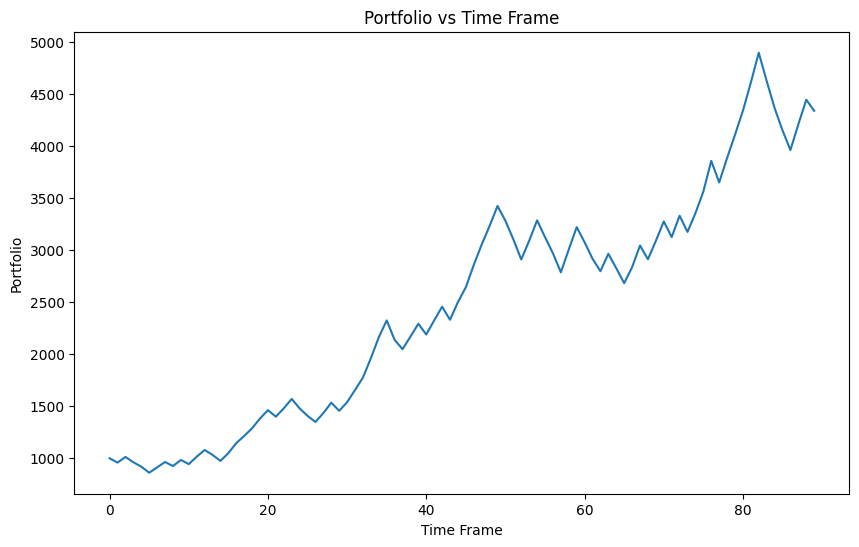

In [80]:
plt.figure(figsize = (10, 6))
plt.plot(portfolio)
plt.title("Portfolio vs Time Frame")
plt.xlabel("Time Frame")
plt.ylabel("Portfolio")
plt.show()